# 1. Micro-structure generation
Micro-structure generation is one of the most important issues in multi-scale simulation. Usually, we can generate a series of different micro-strcutures to reflect the actual distribution of two materials those fullfill an RVE. 
1. Components of RVE
- Fiber material
- Matrix material 
2. Schematic of RVE 
<center><img src="RVE.png" width="300"></center>

<center>Figure 1. schemaric of RVE </center>

# 2. Selected algorithm for Micro-structure generation 

- Generating the micro-structures is a non-trival problem because there are many requirements such as the partiles should not overlap between each other, different shapes of partcles should provide, the particles also shoulf obey the periodical boundary conditions, and so on. 
- With regular shapes, such as disk, ellipse in 2D scenario, sphere in 3D scenario; we can obtain the analytical formula to describe their shapes. Therefore, it provides much more information to design an algorithm to generate the micro-structures. Moreover, most of those algorithms are based on techniques like Monte Carlo Simulation, Melocular dynamics and so forth, so there are no same micro-structures from two different realizations.
- What's more, if the shapes are arbitrary then the generation of micro-structure becomes very difficult as an NP hard problem. 

--selected methods in this version of rve-simulator

[1](https://www.sciencedirect.com/science/article/pii/S0266353808001048?casa_token=s9ISzrlWlGYAAAAA:m0PtidsMewaSuJOFLYEKC9NhggEZa0U01-rxW67DHR1ehCwBMg3gqGnzX3XTMxNF_DwGCxI_) Melro, A. R., Camanho, P. P., & Pinho, S. T. (2008). Generation of random distribution of fibres in long-fibre reinforced composites. Composites Science and Technology, 68(9), 2092-2102.

# 3 Illustration of generating 2D microstructure  

In [1]:
# import the package

from rvesimulator.microstructure.circle_particles import CircleParticles
from rvesimulator.microstructure.shpere_particles import SphereParticles


2023-04-03 18:39:31,348 - Imported f3dasm
2023-04-03 18:39:32.588142: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-03 18:39:33.042593: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-03 18:39:34.214566: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-04-03 18:39:35,420 - None



f3dasm:
       f3dasm: No __version__ attribute!

System:
    python: 3.10.5 | packaged by conda-forge | (main, Jun 14 2022, 07:04:59) [GCC 10.3.0]
executable: /home/jiaxiangyi/anaconda3/envs/f3dasm_env/bin/python
   machine: Linux-5.19.0-38-generic-x86_64-with-glibc2.35

Core package dependencies:
        numpy: 1.23.1
        scipy: 1.9.0
       pandas: 1.4.3
   matplotlib: 3.5.2
       pathos: 0.3.0
        hydra: 1.3.2
     autograd: No __version__ attribute!

Machine learning extension:
   tensorflow: 2.12.0

Optimization extension:
       GPyOpt: 1.2.6
          GPy: 1.10.0
   tensorflow: 2.12.0
        pygmo: 2.19.0

Sampling extension:
        SALib: 1.4.5


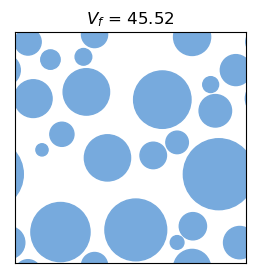

In [2]:
microstructure_generator = CircleParticles(
    length=1.0,
    width=1.0,
    radius_mu=0.1,
    radius_std=0.03,
    vol_req=0.45,
)
microstructure_generator.generate_microstructure()
microstructure_generator.plot_microstructure(figsize=(3, 3))
 

In [4]:
# save the microstrcuture by the abaqus format 
microstructure_info = microstructure_generator.to_abaqus_format(file_name="micro_structure.json") 

## convert the micro-structure to the CRATE format 
for generating the low fidelity data, we have to CRATE where has the SCA and ASCA methods. However, CRATE has its own way to identify the micro-structure with .rgmsh file. 

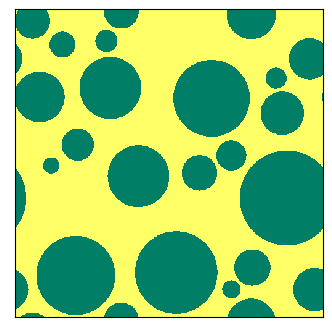

In [5]:
# show it by the crate format 
microstructure_generator.crate_rgmsh(num_discrete=500)
# plot 
microstructure_generator.rgmsh_plot(figsize=(4,4))
# save 
microstructure_generator.to_crate_format(file_name='microstucture.rgmsh')


# 3D RVE micro-structure generation (under developing)

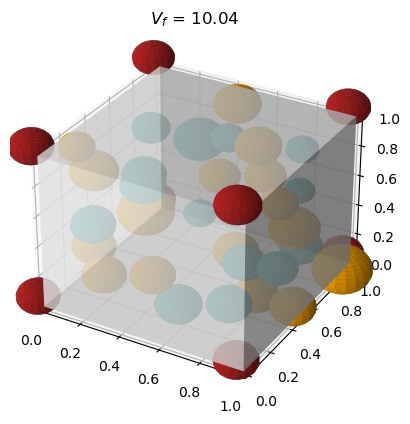

In [6]:
# define the class for 3D microstructure generation
rve3d_generator = SphereParticles(
    length=1.0,
    width=1.0,
    height=1.0,
    radius_mu=0.1,
    radius_std=0.015,
    vol_req=0.10,
)
rve3d_generator.generate_microstructure()
rve3d_generator.plot_microstructure()

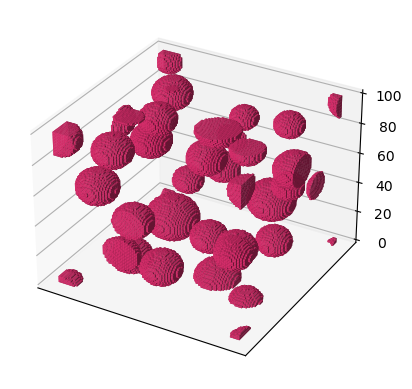

In [7]:
# show it by the crate format 
rve3d_generator.crate_rgmsh(num_discrete=100)
rve3d_generator.rgmsh_plot()